<a href="https://colab.research.google.com/github/satyamlakra/Deep-learning/blob/main/Copy_of_Untitled122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Feb  2 09:57:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pcie_aspm=force

In [ ]:
!pip install -U segmentation-models
!pip install segmentation-models
!pip install tensorflow==2.1.0
!pip install pickle5
!pip install 'h5py==2.10.0' --force-reinstall
!pip install -q kaggle

     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 421.8 MB 23 kB/s 
     |████████████████████████████████| 3.8 MB 43.4 MB/s 
     |████████████████████████████████| 448 kB 68.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=359591362c9acd7d79871c76763fc4eb4f42155d8a8d3563af659ad084ad1373
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satyamlakra","key":"0251af1af0a2ddc2fac655b8a7ba4dc0"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d pengweili/mapillaryvistasval

 99% 2.33G/2.35G [01:19<00:00, 29.2MB/s]
100% 2.35G/2.35G [01:19<00:00, 31.7MB/s]


In [ ]:
!kaggle datasets download -d liammcgunnigle/berkely-deep-drive

 99% 2.07G/2.09G [01:00<00:00, 20.8MB/s]
100% 2.09G/2.09G [01:00<00:00, 36.7MB/s]


In [ ]:
! unzip berkely-deep-drive.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images/train/3d1a6305-3980e3bc.jpg  
  inflating: images/images/train/3d2c1ef5-fdc7bea5.jpg  
  inflating: images/images/train/3d3117f0-9365aac0.jpg  
  inflating: images/images/train/3d317eb1-4a9f2f5c.jpg  
  inflating: images/images/train/3d31c23f-bb0e2813.jpg  
  inflating: images/images/train/3d31d9a7-2fa8d37a.jpg  
  inflating: images/images/train/3d3a3638-268c8d7f.jpg  
  inflating: images/images/train/3d3a3638-d2cf7766.jpg  
  inflating: images/images/train/3d3f2fa6-666e1cf1.jpg  
  inflating: images/images/train/3d411c3d-1324dab3.jpg  
  inflating: images/images/train/3d411c3d-a9202cf2.jpg  
  inflating: images/images/train/3d507efc-2d6c0219.jpg  
  inflating: images/images/train/3d50b2fd-031cce4f.jpg  
  inflating: images/images/train/3d5169ab-8ec93ab4.jpg  
  inflating: images/images/train/3d62a6ae-557b2813.jpg  
  inflating: images/images/train/3d72f33d-629e09ef.jpg  
  inflating: images/images/train/3d74

In [ ]:
from google.colab import drive
drive.mount('/content/GDrive/')


Mounted at /content/GDrive/


In [ ]:
!pip install tensorflow-addons==0.8.3

In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation,UpSampling2D,Input,Reshape,BatchNormalization
#import tensorflow_addons as tfa
from matplotlib import pyplot as plt
from matplotlib import image as img
import pickle5 as pickle
from tensorflow import  keras
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import layers
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import tensorflow_model_optimization as tfmot


In [ ]:
# Initializing Input vector

class_vector =[131 , 142 ,70, 70, 70, 70 ,42 ]
print(class_vector,len(np.unique(class_vector))+1)
tf.compat.v1.disable_eager_execution() 
# Applying the function on input class vector
from tensorflow.keras.utils import to_categorical
o = to_categorical(class_vector, dtype ="uint8")
print(o , len(np.unique(class_vector))+1)


[131, 142, 70, 70, 70, 70, 42] 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 5


In [ ]:
o.shape

(7, 143)

In [ ]:
l= '2008_003429.png'
l=l.replace("png", "jpg")
print(l)

In [ ]:
def dax(x):
    lower_blue=np.array([250,250,250])
    upper_blue=np.array([255,255,255])
     
    mask1 = cv2.inRange(x, lower_blue, upper_blue) 
  
    mas = mask1
    mask = cv2.bitwise_and(x,x, mask=mas)
    mask[mask1!=0]=(60,10,221)
   
    return np.array(mask, dtype=np.float32)


In [ ]:
p =['train']
p1=['train']
gh=256
a=[]
t=[]
r=[]
aa=[]
dirs='/content/images/images'
dirss='/content/color_labels/color_labels'
for i in  p:
    e=os.path.join(dirs,i)
    
    for j in os.listdir(e):
        pa=os.path.join(e,j)
        t.append(pa)
   
t.sort()
t=t[0:5000]        
for ii  in t:        
        
        v=cv2.imread(ii)
        #v=cv2.cvtColor(v, cv2.COLOR_BGR2RGB)
        v=cv2.cvtColor(v, cv2.COLOR_BGR2RGB)
    
        #v = cv2.normalize(v, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        v=cv2.resize(v,(gh,gh))
        a.append([v])
x=[]
y=[]
for f in a:
    x.append(f)

for i in  p1:
    e=os.path.join(dirss,i)
    
    for j in os.listdir(e):
        pa=os.path.join(e,j)
    
        r.append(pa)

r.sort()        
r=r[0:5000]       
for ii in r:        
        v=cv2.imread(ii)
        
        v = cv2.normalize(v, None, alpha=0, beta=28, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        v=cv2.resize(v,(gh,gh))
        v=cv2.cvtColor(v, cv2.COLOR_RGB2GRAY)
        #v=dax(v)
        #re,g,b=cv2.split(v)
        #v=g  
        #v=cv2.merge([(re*0.3+g*0.5+b*0.2)])
        #v = np.array(v,dtype = np.uint8)  
        aa.append([v])

for l in aa:
    
    y.append(l)        
x=np.array(x).reshape(-1,gh,gh,3)

y=np.array(y).reshape(-1,gh,gh,1)



In [ ]:
print(x.shape , y.shape)

(5000, 128, 128, 3) (5000, 128, 128, 29)


In [ ]:
y[0:2,0:2]

In [ ]:
from tensorflow.keras.utils import to_categorical

#pickle_out=open("x.pickle","wb")
#pickle.dump(x,pickle_out,protocol=5)
#pickle_out.close()
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out,protocol=5)
pickle_out.close()
#pickle_in=open("x.pickle","rb")
#x=pickle.load(pickle_in)

y=to_categorical(pickle.load(open("y.pickle","rb")),dtype ="uint8" )

In [ ]:
print(y.shape)
print(x.shape)



(1500, 128, 128, 27)
(1500, 128, 128, 3)


In [ ]:
y[0][0][0]

In [ ]:
v = np.array(c)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,dtype ="uint8")
#pickle_out=open("YY.pickle","wb")
#pickle.dump(YY,pickle_out,protocol=5)
#pickle_out.close()


#pickle_in=open("YY.pickle","rb")

#from sklearn.model_selection import train_test_split
#x_train, x_val,y_train, y_val = train_test_split(X,Y,test_size=0.000336134454, random_state=9,shuffle=True)

In [ ]:
len(np.unique(y[]))

110

In [ ]:
y

In [ ]:
pickle_in=open("YY.pickle","rb")
YY=pickle.load(pickle_in)

In [ ]:
from segmentation_models import FPN
from segmentation_models.utils import set_trainable
from segmentation_models.metrics import FScore
from segmentation_models.losses import DiceLoss

Segmentation Models: using `tf.keras` framework.


In [ ]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

In [ ]:
x_train.shape,,pyramid_block_filters=320

In [ ]:
tf.compat.v1.disable_eager_execution() 
N= x.shape[-1]
base_model =FPN(backbone_name='efficientnetb4',activation='relu',encoder_weights='imagenet')
inp =Input(shape=(gh,gh,N))
l1=Conv2D(3,(3,3),padding='same',activation='relu')(inp)


out=base_model(l1)


l2 =Conv2D(29,(3,3),padding='same',activation='softmax')(out)

model=Model(inp,l2, name=base_model.name)

model.summary()                                                                         

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 3)       84        
_________________________________________________________________
model (Model)                multiple                  20939757  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 29)      5510      
Total params: 20,945,351
Trainable params: 20,817,847
Non-trainable params: 127,504
_________________________________________________________________


In [ ]:
base_model.summary()

In [ ]:
#model=tfmot.sparsity.keras.prune_low_magnitude(model)

In [ ]:
def dice_coef(y_true, y_pred):
    smooth = 1e-7
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f * y_true_f) + K.sum(y_pred_f * y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1. - dice_coef(y_true, y_pred)

In [ ]:
checkpoint = ModelCheckpoint("model-(val_loss:ww82).h5",monitor = "val_loss",verbose=1,save_best_only=True,save_weigths_only=True)

callback_list = [checkpoint]

In [ ]:
ad = Adam(learning_rate=3e-4)
model.compile(optimizer = ad, 
              loss =  dice_coef_loss,
              metrics = [dice_coef])


In [ ]:
xx=np.concatenate((X[100:150],X[2000:2975],X[500:650],X[1500:1650]))
yy=np.concatenate((Y[100:150],Y[2000:2975],Y[500:650],Y[1500:1650]))

In [ ]:
xx=x[::4]
yy=x[::4]
x=np.delete(x,slice(None, None, 4), 0)
y=np.delete(y,slice(None, None, 4), 0)

In [ ]:
def gene(x,y):
    y= to_categorical(y,dtype ="uint8")
    return x,y

In [ ]:
h=model.fit(x=x,y=y, shuffle=True,batch_size = 8 ,validation_split=0.2, epochs=160,callbacks = callback_list,verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/160
3992/4000 [============================>.] - ETA: 0s - loss: 0.3001 - dice_coef: 0.6999
Epoch 00001: val_loss improved from inf to 0.23514, saving model to model-(val_loss:ww82).h5
4000/4000 [==============================] - 240s 60ms/sample - loss: 0.3001 - dice_coef: 0.6999 - val_loss: 0.2351 - val_dice_coef: 0.7649
Epoch 2/160
3992/4000 [============================>.] - ETA: 0s - loss: 0.2420 - dice_coef: 0.7580
Epoch 00002: val_loss improved from 0.23514 to 0.22601, saving model to model-(val_loss:ww82).h5
4000/4000 [==============================] - 230s 58ms/sample - loss: 0.2421 - dice_coef: 0.7579 - val_loss: 0.2260 - val_dice_coef: 0.7740
Epoch 3/160
3992/4000 [============================>.] - ETA: 0s - loss: 0.2240 - dice_coef: 0.7760
Epoch 00003: val_loss improved from 0.22601 to 0.21980, saving model to model-(val_loss:ww82).h5
4000/4000 [==============================] - 230s 57ms/sample - loss: 0.2241 - dice_c

KeyboardInterrupt: ignored

h=model.fit(datagen.flow(x_train, y_train,=32,subset='training'),validation_data=datagen.flow(x_train, y_train, batch_size=32,subset='validation'),steps_per_epoch=100 ,validation_steps=100, epochs=10,callbacks = callback_list,shuffle=True,verbose=1)

In [ ]:
model.save('model-(val_loss:wffw82).h5')

In [ ]:
a=X[0:25].append(X[50:75])

In [ ]:
px = h.history['loss']
py = h.history['val_dice_coef']

In [ ]:
plt.plot(py)

In [ ]:
model=load_model('/content/model-(val_loss:ww82).h5',compile=False)

In [ ]:
model.evaluate(x_val,y_val,verbose=1)

In [ ]:
predict_train = model.predict(x_train[435:440],verbose=1)


In [ ]:
l = np.argmax(predict_train, axis=-1)
l.reshape(5,64,64,1)


In [ ]:
plt.imshow(x[300])

1/1 - 0s


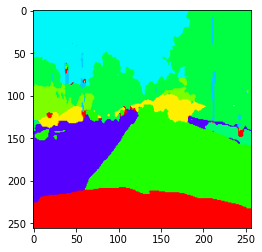

In [ ]:
te=x[2000]
#te=te[0:300,0:250]
#te=cv2.resize(te,(320,320))
ert=np.array([te])
predict_train = model.predict(ert,verbose=2)
l = np.argmax(predict_train[0], axis=-1)
l.reshape(1,gh,gh,1)
asd1 = np.array(l)
asd = np.array(asd1*8,dtype = np.uint8)
#xpx =cv2.merge([asd,asd ,asd])
xpx=cv2.applyColorMap(asd, cv2.COLORMAP_HSV)

xpx=cv2.cvtColor(xpx, cv2.COLOR_BGR2RGB)

plt.imshow(xpx)

In [ ]:
asd1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from astropy.visualization import make_lupton_rgb
bb= np.array(xpx,dtype=np.float64)
re,g,b=cv2.split(bb)
image = make_lupton_rgb(re/5, g/3, b/8, stretch=0.5)
plt.imshow(image/255)

In [ ]:
bb

In [ ]:
asd11 = cv2.imread('/content/GDrive/MyDrive/ims/1022.png')
gh =192
asd1=cv2.cvtColor(asd11, cv2.COLOR_BGR2RGB)
asd1 = cv2.normalize(asd1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
d1=asd11
asd01=cv2.resize(asd1,(gh,gh))
asd1 = np.array([asd01]).reshape(-1,gh,gh,3)
asd = model.predict(asd1)
#asd = np.argmax(asd, axis=-1)
#asd=asd.reshape(1,gh,gh,1)
#asd = np.array(asd[0])
#xpx =cv2.merge([asd,asd,asd])
plt.imshow(asd[0])

In [ ]:
plt.imshow(asd01)


In [ ]:
!pip install Js2Py

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import js2py
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
!pip install requires.io

In [ ]:
import PIL
import io

def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGB')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  

In [ ]:
gh=320
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,3], dtype=np.uint8)

    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
    n =frame
    frame=np.array(frame)
    #frame=cv2.resize(frame,(720,960))
    frame=cv2.resize(frame,(gh,gh))
    #frame=cv2.medianBlur(frame,5) 
    frame=np.array([frame],dtype=np.float32).reshape(-1,gh,gh,3)
    predict_v= model.predict(frame,workers=320,use_multiprocessing=True) 
    
    #l = np.argmax(predict_v, axis=-1)
    #l.reshape(1,gh,gh,1)
    #xpx =cv2.merge([l[0],l[0],l[0]])
    #vv = xpx/255
    #vv=np.array(vv, dtype=np.float32)
           
    vv=cv2.resize(predict_v[0],(640,480))
    #fr=cv2.GaussianBlur(vv,(51,51),2)
    #vv=cv2.addWeighted(vv,2,fr,-1,4)
    vv=cv2.cvtColor(vv/255, cv2.COLOR_BGR2RGB)
    vv=cv2.medianBlur(vv,5)
    #vv=np.array([vv],dtype=np.float32)
    #vv[:,:,3] = (vv.max(axis =2) > 0 ).astype(int)*255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(vv)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
frame.shape

In [ ]:
cap = cv2.VideoCapture(1)

while(cap.isOpened()):

    ret, frame = cap.read()
    gray1 = frame
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    l1= np.array([20,133,67],np.uint8)
    u1= np.array([205,163,127],np.uint8)
    l2= np.array([7,110,100],np.uint8)
    u2= np.array([205,163,135],np.uint8)
    mask1=cv2.inRange(frame,l1,u1)
    mask2=cv2.inRange(frame,l2,u2)
   
    mass = mask1          
           
    cv2.imshow('test', mass)
    cv2.imshow('dfg',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

import os 

class satyam :
    def __init__(self,a = 56 ,b= 85 ):
        self.j=a
        self.h=b
    def get(self):
        return self.j + self.h
    def ty(self):
       
        pass
    def __add__(self,other):
        return self.h * other.h    
       
class er(satyam):
    def __init__(self,a= 2, b =23):
        
       super().__init__(a,b)  

satyam.a=0
s=satyam()
print(s.get())

In [ ]:
t=Y[463: ]

In [ ]:
label = [0,1,1,0]
label = tf.keras.utils.to_categorical(label,3)
print(label) #output: label = [[1,0],[0,1],[0,1],[1,0]]

print(label) #output back to [0,1,1,0]

In [ ]:
label = tf.keras.utils.to_categorical(t)

In [ ]:
label

In [ ]:
t.shape

In [ ]:
np.argmax([predict_val[195]],axis=-1)

In [ ]:
y_binary[0][0][1]

In [ ]:
plt.imshow(y_binary)

In [ ]:
label = np.argmax(t, axis=-1)

In [ ]:
label

In [ ]:
label.shape

In [ ]:
label[0][0]

In [ ]:
Y.shape

In [ ]:
y_val

In [ ]:
l = np.argmax(y_val, axis=-1)
l.reshape(100,128,128,1)

In [ ]:
l=cv2.cvtColor(l[0], cv2.COLOR_BGR2GRAY)

In [ ]:
YY